In [6]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
plt.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

In [7]:
raw_df = pd.read_csv("./data/chu2016Data.csv", header='infer', index_col=0, sep=",", encoding=sys.getfilesystemencoding())

In [8]:
cell_stages = raw_df['Stage'].astype('int').values

In [9]:
raw_df = raw_df.drop('Stage',1)

In [10]:
raw_df.shape

(758, 100)

Dimension reduction with locally_linear_embedding(LLE).



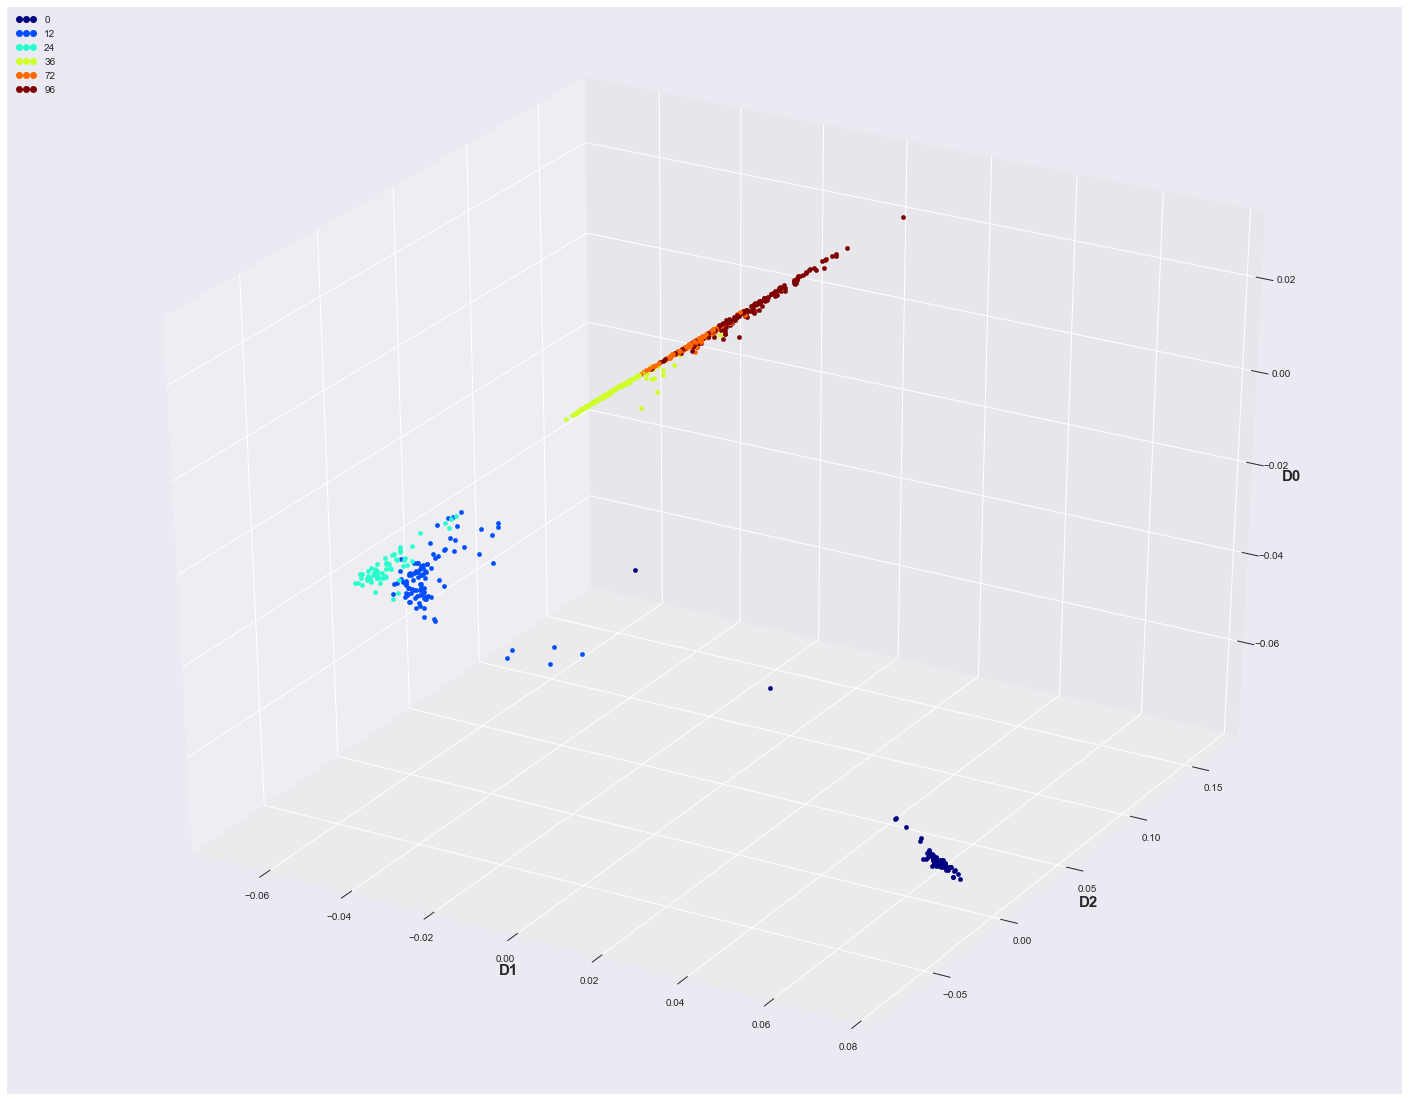

In [11]:
from SCOUT import *
Z = SCOUT(raw_df, stages=cell_stages)
V = Z.dim_down(ndim=3,method='lle',rand_seed=6)
Z.plotD(V,dims=[1,2,0])

Clustering with Gaussian Mixture
traj_sorted_indices [[0, 1, 2, 3, 4, 5], [0, 1, 6, 7, 8], [0, 1, 9]]


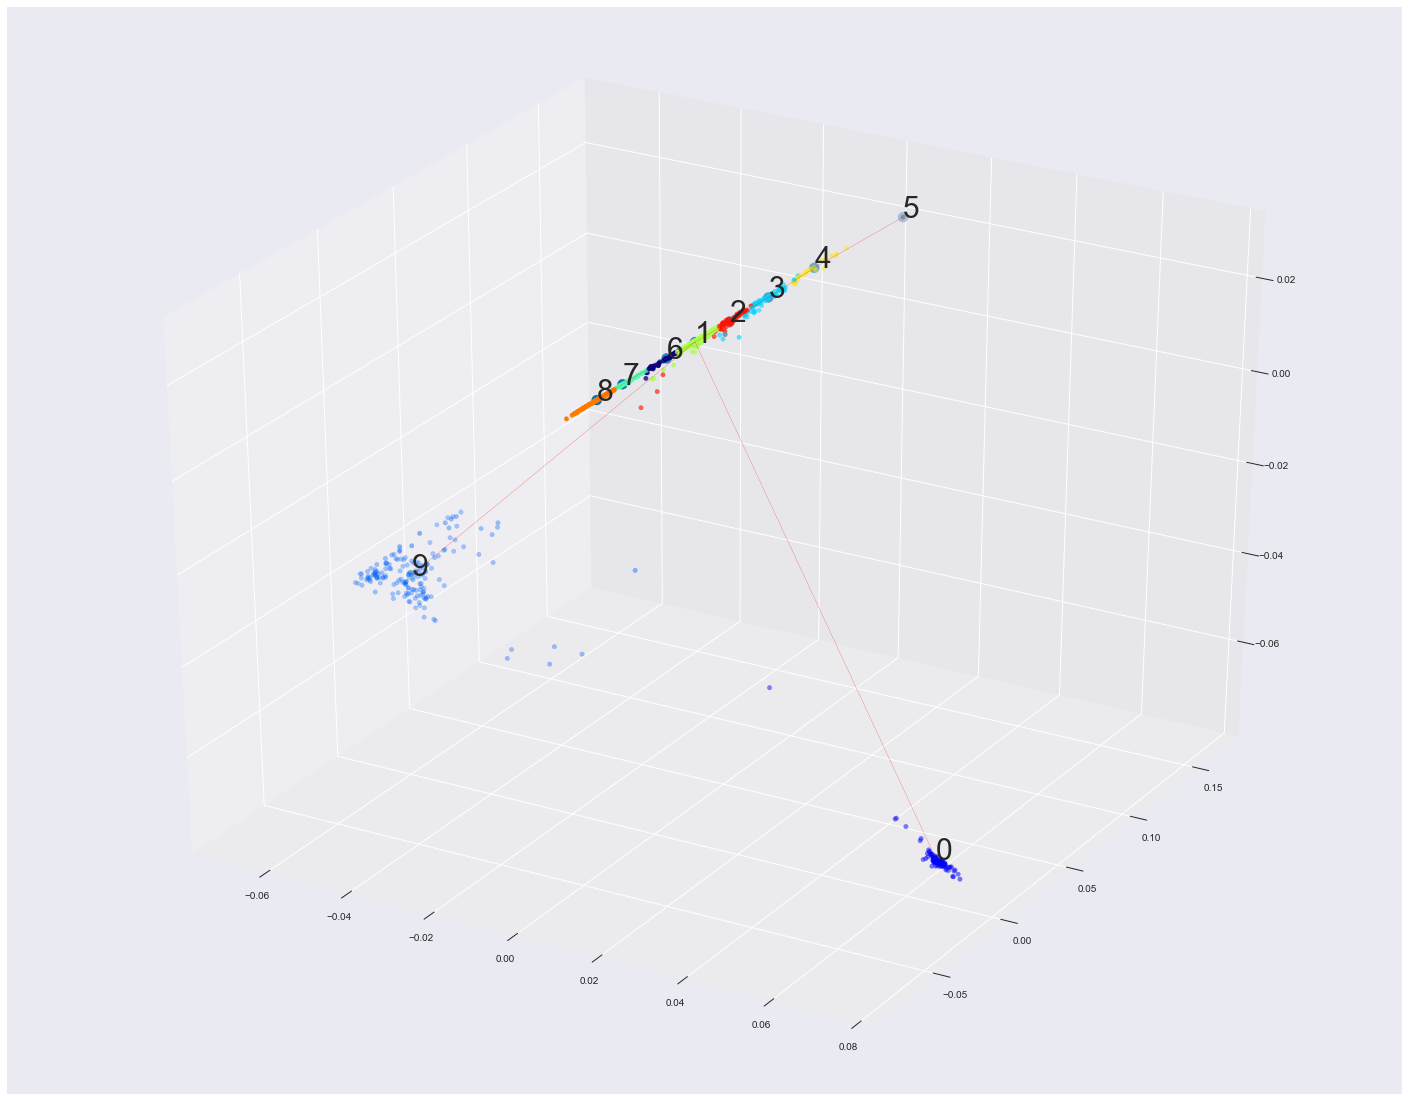

In [6]:
landmarks = Z.cluster_landmarks(V,method='gmm',nclust=10,traj_branch =True) # 14
Z.plotD(V,dims=[1,2,0])

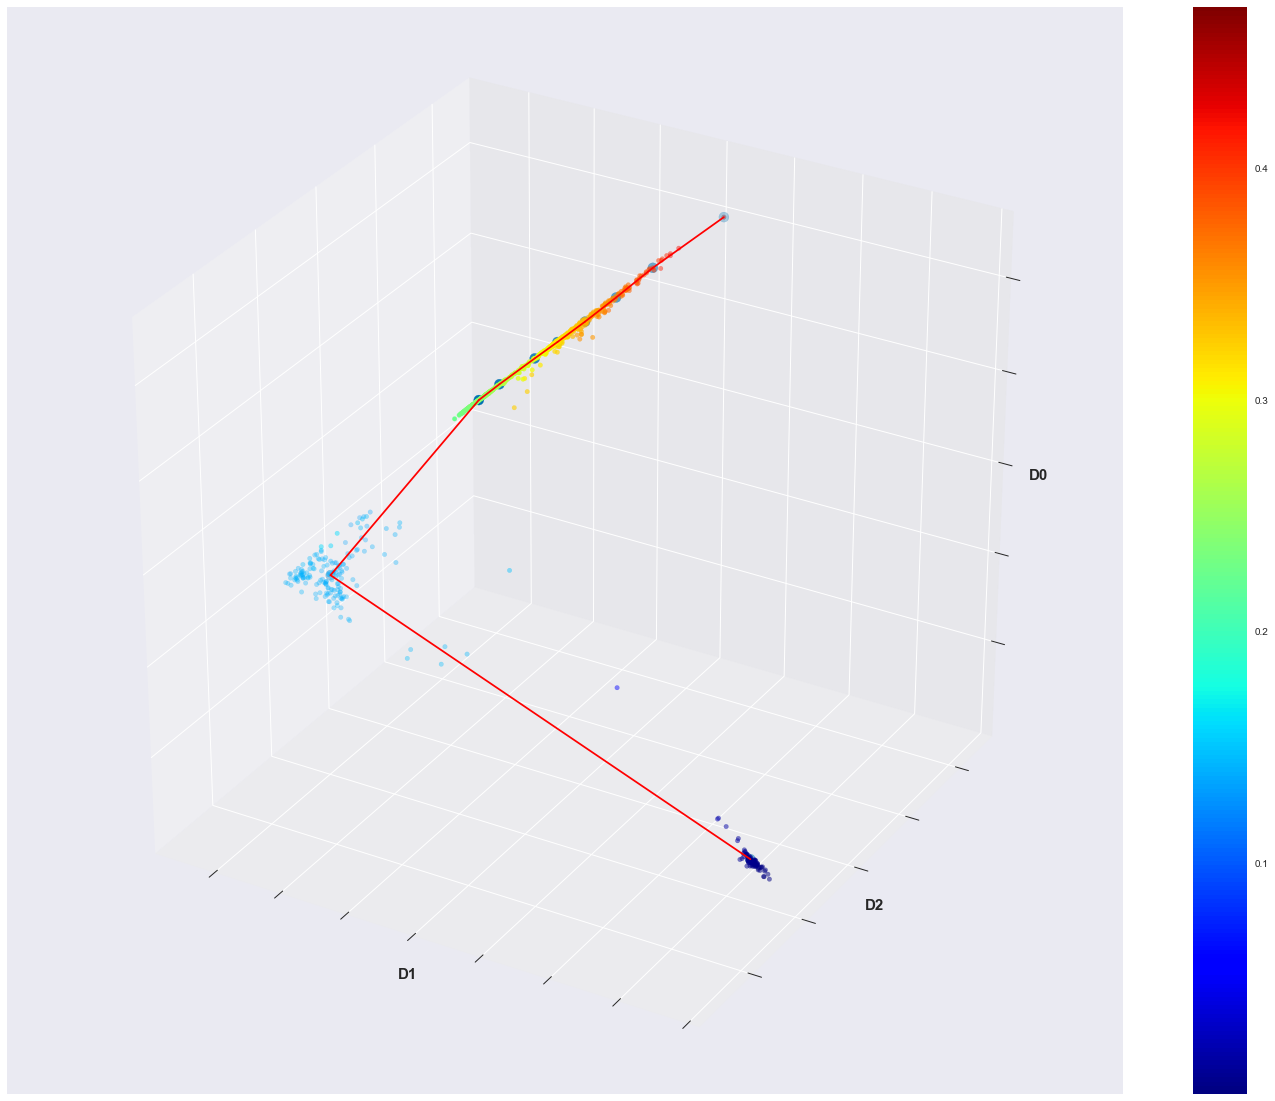

In [7]:
branches = [[0, 9,8,7,6,1, 2,3, 4, 5]]
cell_scores,cell_order = Z.get_ordering(V,branches, method = 'wd',delta=0.05)
Z.plotT(V,cell_scores,dims=[1,2,0],plotlandmark=True)

traj_sorted_indices [[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 8, 9, 10, 11], [0, 1, 12, 13]]


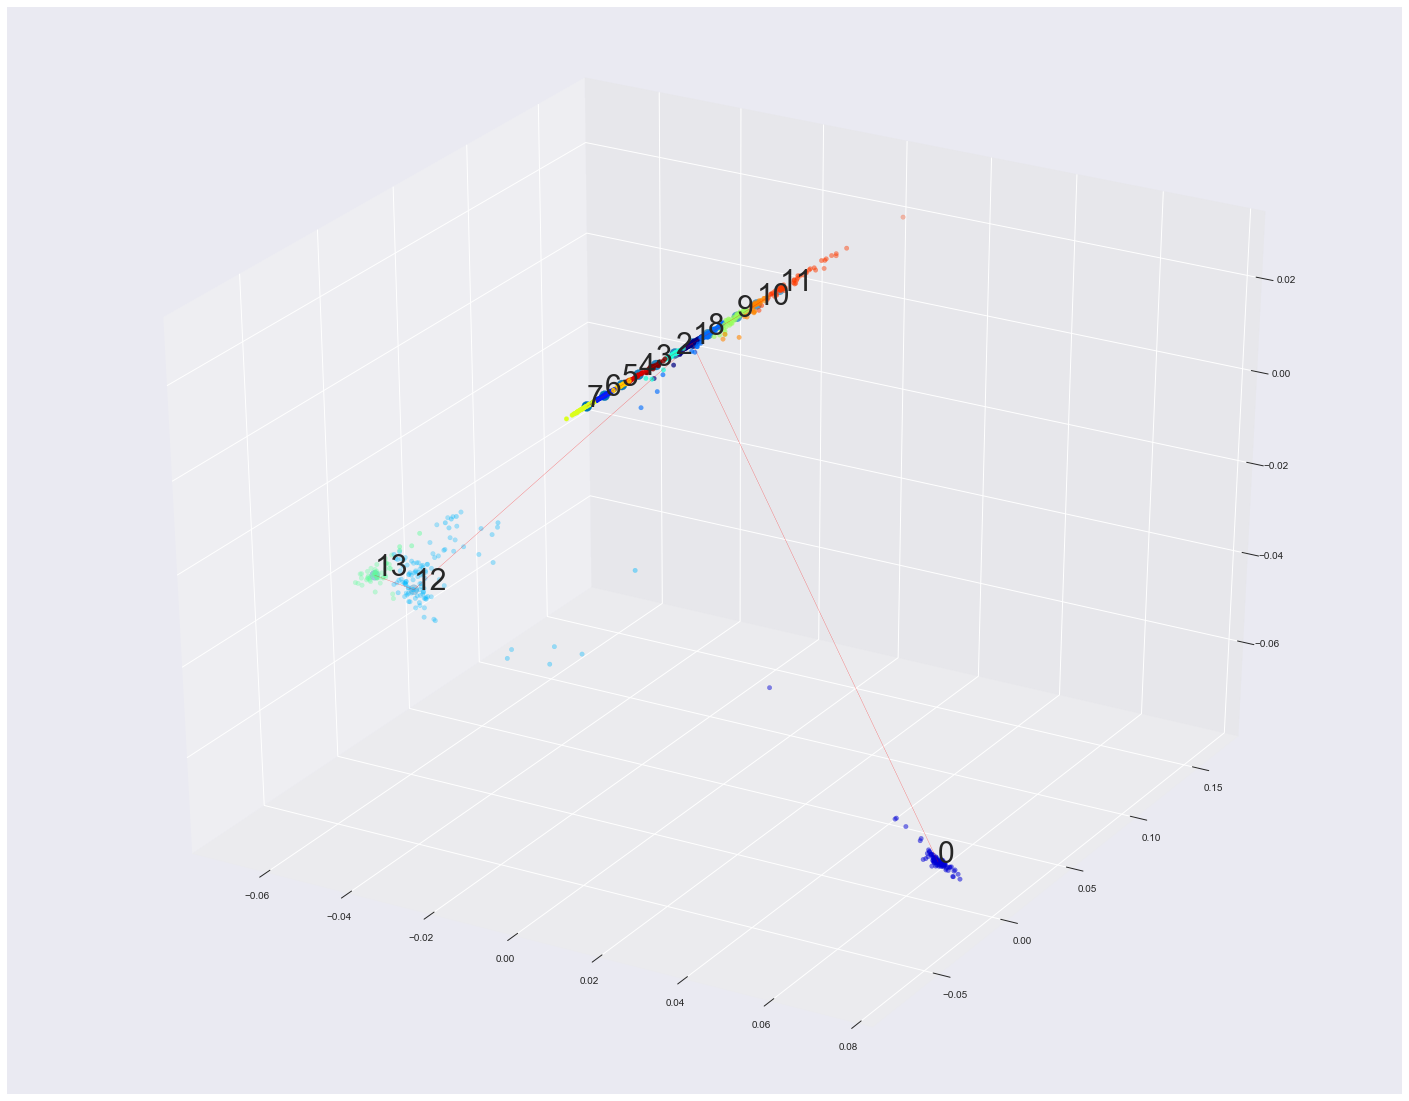

In [8]:
landmarks = Z.density_landmarks(V, r=0.011, delta=0.15, traj_branch =True) #
Z.plotD(V,dims=[1,2,0])

In [9]:
branches = [[0,  12, 13 , 7,6,5,4,3,2, 1, 8, 9, 10, 11]]

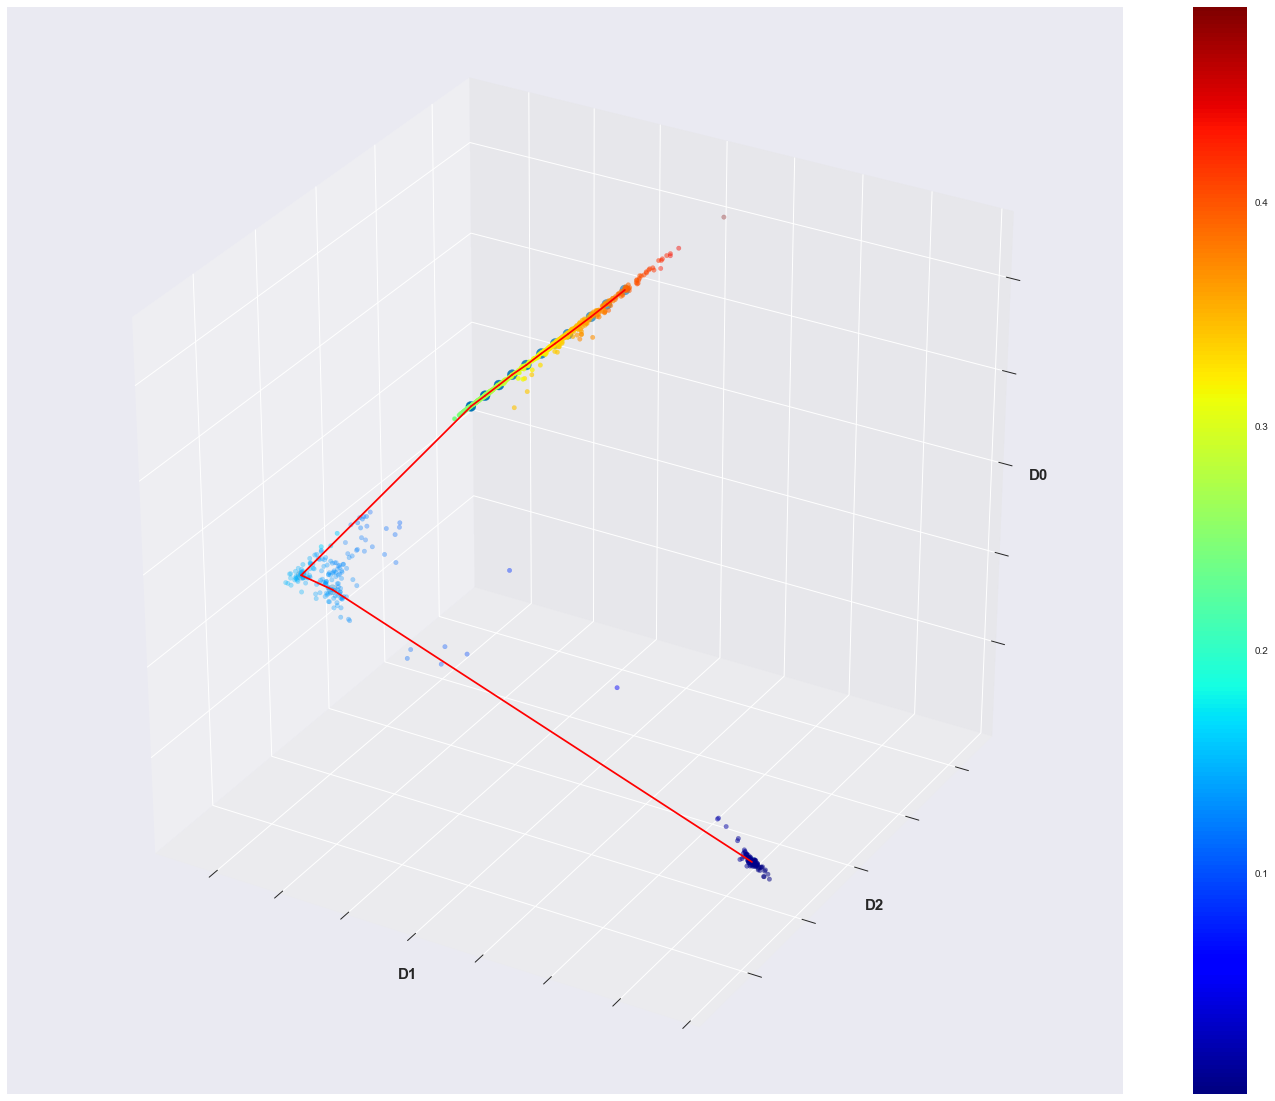

In [10]:
cell_scores,cell_order = Z.get_ordering(V,branches, method = 'wd',delta=0.05)
Z.plotT(V,cell_scores,dims=[1,2,0],plotlandmark=True)

In [11]:
cell_scores
order = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])
stage_order = [cell_stages[i] for i in order]

from scipy import stats
cor = stats.pearsonr(stage_order,cell_stages)[0]
print(cor)

0.9519012469388733


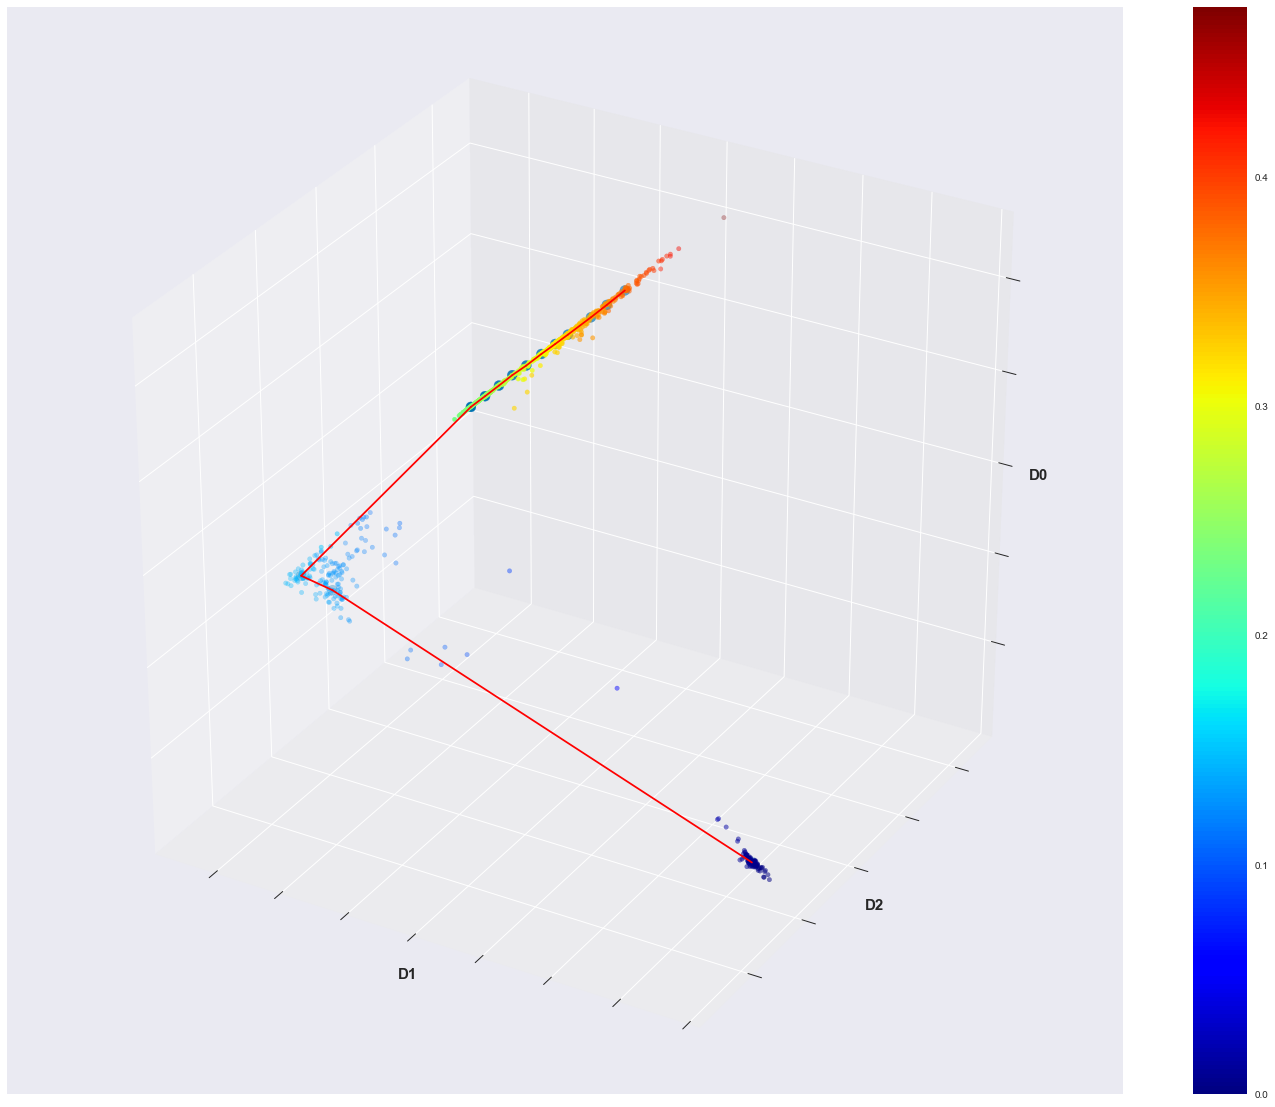

In [12]:
cell_scores,cell_order = Z.get_ordering(V,branches,method = 'ap')
Z.plotT(V,cell_scores,dims=[1,2,0],plotlandmark=True)

In [13]:
cell_scores
order = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])
stage_order = [cell_stages[i] for i in order]

from scipy import stats
cor = stats.pearsonr(stage_order,cell_stages)[0]
print(cor)

0.9512745530879141
